In [1]:
!pip install tensorflow-addons



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import glob
import random
import numpy as np
import pandas as pd

import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

from tqdm import tqdm

from PIL import Image

from tensorflow.keras.utils import to_categorical

import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt

C:\Users\MOHD ZEESHAN\anaconda3\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [3]:
train_data = pd.read_csv("D:\\shahbaz\\training.csv")
test_data = pd.read_csv("D:\\shahbaz\\testing.csv")

In [33]:
train_fol = glob.glob("D:\\shahbaz\\train*") 
test_fol = glob.glob("D:\\shahbaz\\test*")

In [34]:
train_fol

['D:\\shahbaz\\train', 'D:\\shahbaz\\training.csv']

In [35]:
train_data

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop
...,...,...
12595,Image_12596.jpg,sitting
12596,Image_12597.jpg,clapping
12597,Image_12598.jpg,sitting
12598,Image_12599.jpg,dancing


In [36]:
test_data

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg
...,...
5395,Image_5396.jpg
5396,Image_5397.jpg
5397,Image_5398.jpg
5398,Image_5399.jpg


In [37]:
train_data.label.value_counts()

sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: label, dtype: int64

In [38]:
import plotly.express as px
HAR = train_data.label.value_counts()
fig = px.pie(train_data, values=HAR.values, names=HAR.index, title='Distribution of Human Activity')
fig.show()

In [39]:
#train_fol = glob.glob("../input/human-action-recognition-har-dataset/Human Action Recognition/train/*") 
#train = "../input/human-action-recognition-har-dataset/Human Action Recognition/train/"

In [40]:
filename = train_data['filename']

situation = train_data['label']

In [41]:
filename

0            Image_1.jpg
1            Image_2.jpg
2            Image_3.jpg
3            Image_4.jpg
4            Image_5.jpg
              ...       
12595    Image_12596.jpg
12596    Image_12597.jpg
12597    Image_12598.jpg
12598    Image_12599.jpg
12599    Image_12600.jpg
Name: filename, Length: 12600, dtype: object

In [42]:
situation

0                   sitting
1              using_laptop
2                   hugging
3                  sleeping
4              using_laptop
                ...        
12595               sitting
12596              clapping
12597               sitting
12598               dancing
12599    listening_to_music
Name: label, Length: 12600, dtype: object

In [58]:
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as img

def displaying_random_images():
    num = random.randint(1, 10000)
    imgg = "Image_{}.jpg".format(num)
    train = "D:\\shahbaz\\train"
    if os.path.exists(os.path.join(train, imgg)):
        testImage = img.imread(os.path.join(train, imgg))
        plt.imshow(testImage)
        plt.title("{}".format(train_data.loc[train_data['filename'] == "{}".format(imgg), 'label'].item()))
        plt.show()
    else:
        print("File Path not found \nSkipping the file!!")


Creating a function to random take a image and display it with its label

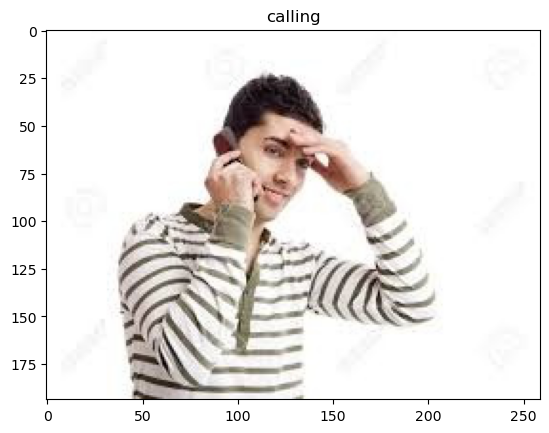

In [61]:
displaying_random_images()

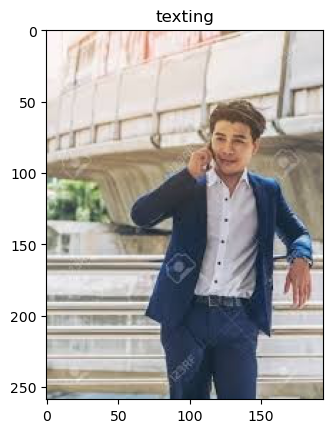

In [62]:
displaying_random_images()

In [100]:
import os

img_data = []
img_label = []

# Assuming train_fol, filename, and situation contain your data
for i in range(len(train_fol)):
    t = os.path.join('D:\\shahbaz\\train', filename[i])  # Use os.path.join for file path concatenation
    temp_img = Image.open(t)
    img_data.append(np.asarray(temp_img.resize((160,160))))
    img_label.append(situation[i])


In [101]:
inp_shape = (160, 160,3)

In [102]:
iii = img_data
iii = np.asarray(iii)
type(iii)

numpy.ndarray

In [103]:
y_train = to_categorical(np.asarray(train_data['label'].factorize()[0]))
print(y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [82]:
vgg_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(160,160,3),
                   pooling='avg',classes=15,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

vgg_model.add(pretrained_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(15, activation='softmax'))

58889256/58889256 [==============================] - 400s 7us/step


In [104]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [105]:
vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 15)                7695      
                                                                 
Total params: 14985039 (57.16 MB)
Trainable params: 270351 (1.03 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [109]:
# Function to read images as array

def read_image(fn):
    image = Image.open(fn)
    return np.asarray(image.resize((160,160)))

In [110]:
def test_predict(test_image):
    result = vgg_model.predict(np.asarray([read_image(test_image)]))

    itemindex = np.where(result==np.max(result))
    prediction = itemindex[1][0]
    print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", prediction)

    image = img.imread(test_image)
    plt.imshow(image)
    plt.title(prediction)

1/1 [==============================] - 0s 248ms/step
probability: 51.0350227355957%
Predicted class :  7


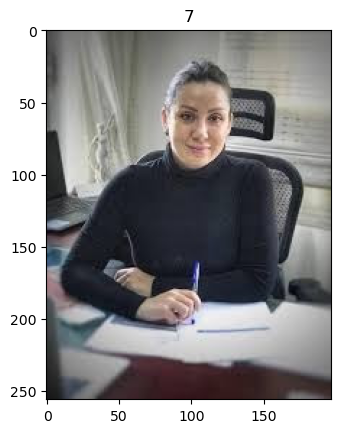

In [111]:
test_predict('D:\\shahbaz\\test\\Image_5.jpg')

1/1 [==============================] - 0s 69ms/step
probability: 93.81006956100464%
Predicted class :  7


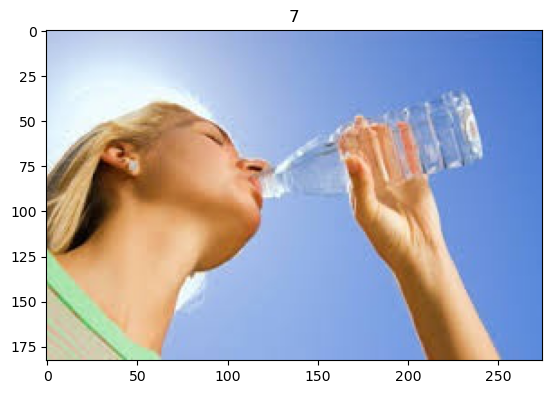

In [112]:
test_predict('D:\\shahbaz\\test\\Image_21.jpg')

1/1 [==============================] - 0s 65ms/step
probability: 70.2296257019043%
Predicted class :  7


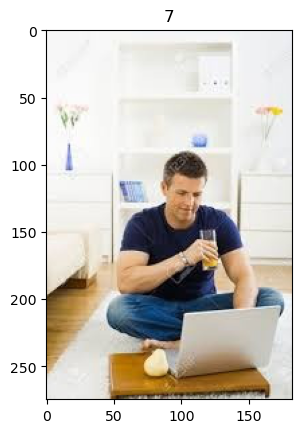

In [113]:
test_predict('D:\\shahbaz\\test\\Image_51.jpg')

In [ ]:
"D:\shahbaz\test\Image_51.jpg"

In [107]:
vgg_model.save_weights("model.h5")

In [108]:
losss = history.history['loss']
plt.plot(losss)

NameError: name 'history' is not defined

In [73]:
efficientnet_model = Sequential()

model = tf.keras.applications.EfficientNetB7(include_top=False,
                                            input_shape=(160,160,3),
                                            pooling ="avg",classes=15,
                                             weights="imagenet")

for layer in model.layers:
    layer.trainable=False
    

efficientnet_model.add(model)
efficientnet_model.add(Flatten())
efficientnet_model.add(Dense(512,activation="relu"))
efficientnet_model.add(Dense(15,activation="softmax"))

258076736/258076736 [==============================] - 1390s 5us/step


In [74]:
efficientnet_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [75]:
efficientnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional  (None, 2560)              64097687  
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2560)              0         
                                                                 
 dense (Dense)               (None, 512)               1311232   
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 65416614 (249.54 MB)
Trainable params: 1318927 (5.03 MB)
Non-trainable params: 64097687 (244.51 MB)
_________________________________________________________________


In [79]:
print("Shape of iii (input data):", iii.shape)
print("Shape of y_train (target labels):", y_train.shape)


Shape of iii (input data): (2, 160, 160, 3)
Shape of y_train (target labels): (12600, 15)


In [80]:
history = efficientnet_model.fit(iii,y_train,epochs=60)

ValueError: Data cardinality is ambiguous:
  x sizes: 2
  y sizes: 12600
Make sure all arrays contain the same number of samples.

In [81]:
losses = history.history["loss"]
plt.plot(losses)

NameError: name 'history' is not defined